# Praktikum 5 - Sentiment Analysis
Sentiment Analysis merupakan salah satu bahasan dalam Natural Language Processing (NLP). Sentiment Analysis adalah proses untuk mendefinisikan sebuah teks termasuk ke dalam kategori <b>positif, negatif, </b>atau <b>neutral</b>. Hal ini juga dikenal sebagai opinion mining, berdasarkan opini atau sikap dari penulis/pembicara.

## Agenda
1. Simple Twitter Sentiment Analysis using NLTK
2. Airline Twitter Sentiment Analysis (14640 tweets) and Predict New Tweet
3. Sentiment Analysis Review Movies using Gensim Doc2Vec

## 1. Simple Twitter Sentiment Analysis using NLTK
Pada bagian ini, kita menggunakan 15 sample tweets yang 5 tweets berlabel positif, 5 tweets berlabel negatif, dan 5 tweets untuk test. 

In [1]:
pos_tweets = [('I love this car', 'positive'),
              ('This view is amazing', 'positive'),
              ('I feel great this morning', 'positive'),
              ('I am so excited about the concert', 'positive'),
              ('He is my best friend', 'positive')]

neg_tweets = [('I do not like this car', 'negative'),
              ('This view is horrible', 'negative'),
              ('I feel tired this morning', 'negative'),
              ('I am not looking forward to the concert', 'negative'),
              ('He is my enemy', 'negative')]

test = [('I feel happy this morning', 'positive'),
        ('Larry is my friend', 'positive'),
        ('I do not like that man', 'negative'),
        ('My house is not great', 'negative'),
        ('Your song is annoying', 'negative')]

### Preprocessing
- Dengan preprocessing sederhana, yaitu hanya menggunakan kata yang jumlah karakter lebih dari 3 akan termasuk data yang akan diproses.

In [2]:
tweets = []
for (words, sentiment) in pos_tweets + neg_tweets:
    words_filtered = [e.lower() for e in words.split() if len(e) >= 3]
    tweets.append((words_filtered, sentiment))

- Hasil dari list tweets yang menggabungkan positif dan negatif tweets.

In [3]:
print(tweets)

[(['love', 'this', 'car'], 'positive'), (['this', 'view', 'amazing'], 'positive'), (['feel', 'great', 'this', 'morning'], 'positive'), (['excited', 'about', 'the', 'concert'], 'positive'), (['best', 'friend'], 'positive'), (['not', 'like', 'this', 'car'], 'negative'), (['this', 'view', 'horrible'], 'negative'), (['feel', 'tired', 'this', 'morning'], 'negative'), (['not', 'looking', 'forward', 'the', 'concert'], 'negative'), (['enemy'], 'negative')]


- Lakukan hal yang sama pada test tweets

In [4]:
test_tweets = []
for (words, sentiment) in test:
    words_filtered = [e.lower() for e in words.split() if len(e) >= 3]
    test_tweets.append((words_filtered, sentiment))

- Hasil list dari test tweets

In [5]:
print(test_tweets)

[(['feel', 'happy', 'this', 'morning'], 'positive'), (['larry', 'friend'], 'positive'), (['not', 'like', 'that', 'man'], 'negative'), (['house', 'not', 'great'], 'negative'), (['your', 'song', 'annoying'], 'negative')]


### Classifier
Classifier yang digunakan adalah naive bayes.
- List dari fitur kata pada variable <b>tweets</b> dilakukan ekstraksi. Sehingga diketahui jumlah frekuensi kemunculan kata

In [6]:
import nltk

def get_words_in_tweets(tweets):
    all_words = []
    for(words, sentiment) in tweets:
        all_words.extend(words)
    return all_words

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    word_features = wordlist.keys()
    return word_features

word_features = get_word_features(get_words_in_tweets(tweets))

In [7]:
print(word_features)

dict_keys(['love', 'this', 'concert', 'best', 'view', 'excited', 'great', 'feel', 'not', 'amazing', 'car', 'enemy', 'about', 'tired', 'like', 'looking', 'the', 'forward', 'friend', 'horrible', 'morning'])


- Untuk membuat sebuah classifier, kita butuh untuk menentukan fitur apa saja yang relevan. Sehingga kita butuh feature extractor.

In [8]:
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

- Sebagai contoh, terdapat document dengan kata <b>'love', 'this', 'car'</b> kemudian dilakukan extraksi fitur kata.

In [9]:
doc = ['love', 'this', 'car']

print(extract_features(doc))

{'contains(tired)': False, 'contains(forward)': False, 'contains(view)': False, 'contains(enemy)': False, 'contains(like)': False, 'contains(this)': True, 'contains(about)': False, 'contains(looking)': False, 'contains(friend)': False, 'contains(love)': True, 'contains(great)': False, 'contains(horrible)': False, 'contains(feel)': False, 'contains(the)': False, 'contains(best)': False, 'contains(morning)': False, 'contains(amazing)': False, 'contains(not)': False, 'contains(concert)': False, 'contains(car)': True, 'contains(excited)': False}


- Dengan adanya feature extractor, kita bisa menerapkan fitur pada classifier menggunakan fungsi <b>apply_features</b>.

In [10]:
training_set = nltk.classify.apply_features(extract_features, tweets)

In [11]:
print(training_set)

[({'contains(tired)': False, 'contains(forward)': False, 'contains(view)': False, 'contains(enemy)': False, 'contains(like)': False, 'contains(this)': True, 'contains(about)': False, 'contains(looking)': False, 'contains(friend)': False, 'contains(love)': True, 'contains(great)': False, 'contains(horrible)': False, 'contains(feel)': False, 'contains(the)': False, 'contains(best)': False, 'contains(morning)': False, 'contains(amazing)': False, 'contains(not)': False, 'contains(concert)': False, 'contains(car)': True, 'contains(excited)': False}, 'positive'), ({'contains(tired)': False, 'contains(forward)': False, 'contains(view)': True, 'contains(enemy)': False, 'contains(like)': False, 'contains(this)': True, 'contains(about)': False, 'contains(looking)': False, 'contains(friend)': False, 'contains(love)': False, 'contains(great)': False, 'contains(horrible)': False, 'contains(feel)': False, 'contains(the)': False, 'contains(best)': False, 'contains(morning)': False, 'contains(amazing)

- Setelah berhasil memiliki training set, sekarang kita dapat melakukan training pada classifier. Classifier yang digunakan adalah Naive Bayes

In [12]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

Naive Bayes Classifier menggunakan prior probability pada setiap label yang merupakan frekuensi tiap label pada training set, dan kontribusi dari fitur.

### Classify
Setelah kita memiliki classifier, kita bisa melakukan klasifikasi sebuah tweet dan melihat termasuk kategori apa tweet tersebut. Berikut adalah contohnya.

In [13]:
tweet = 'Larry is my friend'
print(classifier.classify(extract_features(tweet.split())))

positive


Tweet di atas termasuk kategori <b>positif</b> karena kata <b>friend</b> berasosiasi pada tweet positif <b>He is my best friend</b>

In [14]:
# mengeluarkan hasil positive karena feature name 'annoying' belum terdapat pada trainin
tweet2 = 'Your song is annoying'
print(classifier.classify(extract_features(tweet2.split())))

positive


Sedangkan pada tweet di atas, kata <b>annoying</b> belum terdaftar sebagai salah satu fitur di training set.

## 2. Airline Twitter Sentiment Analysis (14640 tweets) and Predict New Tweet
Pada bagian kedua, terinspirasi dari [kaggle](https://www.kaggle.com/) dalam melakukan sentiment analysis tweet airline. 

### Import Files dan Packages
Sebagai persiapan download dataset <b>Tweets.csv</b> yang berisi tweet airline pada link [berikut](https://www.kaggle.com/crowdflower/twitter-airline-sentiment). Pastikan letakkan file pada lokasi yang berdekatan dengan file .ipynb. Pada praktikum ini, kami letakkan satu lokasi dengan file .ipynb 

In [15]:
# Import File and Packages
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import re
import warnings
warnings.filterwarnings("ignore")

# Read csv file into data frame
tweet=pd.read_csv("Tweets.csv")

### Load and preprocess data using NLTK
<b><i>Tokenize, Clean, Stem, Lemmatize, Remove stopwords</i></b>

In [16]:
# Preprocess the data {'negative': 0 , 'positive': 1 , 'neutral': 2}

df = tweet.iloc[:,(10,1)]
df.columns = ['data', 'target']
df['target'] = df['target'].str.strip().str.lower()
df['target'] = df['target'].map({'negative': 0 , 'positive': 1 , 'neutral': 2})

# Copy df to a temporary dataframe for pre-processing
dft = df

In [17]:
%%time
# Remove @tweets, numbers, hyperlinks that do not start with letters
dft['data'] = dft['data'].str.replace("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([0-9])"," ")

Wall time: 1.64 s


In [18]:
%%time
# tokenize into words
import nltk
dft['data'] = dft['data'].apply(nltk.word_tokenize)

Wall time: 15.4 s


In [19]:
%%time
# stem the tokens
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')
dft['data'] = dft['data'].apply(lambda x: [stemmer.stem(y) for y in x])

Wall time: 22 s


In [20]:
%%time
# Lemmatizing
lemmatizer = nltk.WordNetLemmatizer()
dft['data'] = dft['data'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

Wall time: 25.5 s


In [21]:
%%time
# Remove stopwords
stopwords = nltk.corpus.stopwords.words('english')

# stem the stopwords
stemmed_stops = [stemmer.stem(t) for t in stopwords]

# remove stopwords from stemmed/lemmatized tokens
dft['data'] = dft['data'].apply(lambda x: [stemmer.stem(y) for y in x if y not in stemmed_stops])

# remove words whose length is <3
dft['data'] = dft['data'].apply(lambda x: [e for e in x if len(e) >= 3])

Wall time: 19.6 s


In [22]:
%%time
# Detokenize cleaned dataframe for vectorizing
dft['data'] = dft['data'].str.join(" ") 

Wall time: 373 ms


### Printing data shape:
mencetak shape dari dataset yang akan diproses.

In [23]:
# Print attributes of tweet, X and y
print('Shape of original file : ', tweet.shape)
print('All columns of the original file : ', tweet.columns.tolist() , '\n')
print('Columns dft dataframe : ',dft.columns.tolist(), '\n') 
print('Shape data and target : ', dft['data'].shape, dft['target'].shape, '\n')
print('Mood Count target :\n', tweet['airline_sentiment'].value_counts())

Shape of original file :  (14640, 15)
All columns of the original file :  ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'] 

Columns dft dataframe :  ['data', 'target'] 

Shape data and target :  (14640,) (14640,) 

Mood Count target :
 negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


### Initialize X y :

In [24]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer

X = dft['data']
y = dft['target']

### Print top features with freaquency:

In [25]:
def print_top_words():    
    # Print top words
    vect = CountVectorizer(stop_words='english',analyzer="word", min_df = 2, max_df = 0.8)
    data_dtm = vect.fit_transform(dft['data'])
    feat_dtm = vect.get_feature_names()

    # Count words
    freq_tbl = pd.DataFrame({'Word':feat_dtm,'Occurence':np.asarray(data_dtm.sum(axis=0)).ravel().tolist()})
    freq_tbl['Word'] = freq_tbl['Word'].str.strip()

    # Print top words
    topt = freq_tbl.sort(['Occurence'], ascending=[False]).head(10)
    y = topt['Occurence']
    plt.grid()
    X = range(1, 11)
    plt.bar(X,y,color='g')
    plt.xlabel('Top words')
    plt.ylabel('Occurence')
    plt.title('Frequency of top 10 words')
    plt.xticks(X,topt['Word'],rotation=90)
    
def print_top_neg_words():    
    # Print top negative words
    vect = CountVectorizer(stop_words='english',analyzer="word", min_df = 2, max_df = 0.8)
    filt = dft[dft['target'] == 0]
    data_dtm = vect.fit_transform(filt['data'])
    feat_dtm = vect.get_feature_names()

    # Count words
    freq_tbl = pd.DataFrame({'Word':feat_dtm,'Occurence':np.asarray(data_dtm.sum(axis=0)).ravel().tolist()})
    freq_tbl['Word']=freq_tbl['Word'].str.strip()

    # Print top negative words
    topt = freq_tbl.sort(['Occurence'], ascending=[False]).head(10)
    y = topt['Occurence']
    plt.grid()
    X = range(1, 11)
    plt.bar(X,y,color='g')
    plt.xlabel('Top negative words')
    plt.ylabel('Occurence')
    plt.title('Frequency of top 10 negative words')
    plt.xticks(X,topt['Word'],rotation=90)
    
def print_top_pos_words():    
    # Print top positive words
    vect = CountVectorizer(stop_words='english',analyzer="word", min_df = 2, max_df = 0.8)
    filt = dft[dft['target'] == 1]
    data_dtm = vect.fit_transform(filt['data'])
    feat_dtm = vect.get_feature_names()

    # Count words
    freq_tbl = pd.DataFrame({'Word':feat_dtm,'Occurence':np.asarray(data_dtm.sum(axis=0)).ravel().tolist()})
    freq_tbl['Word']=freq_tbl['Word'].str.strip()

    # Print top positive words
    topt = freq_tbl.sort(['Occurence'], ascending=[False]).head(10)
    y = topt['Occurence']
    plt.grid()
    X = range(1, 11)
    plt.bar(X,y,color='g')
    plt.xlabel('Top positive words')
    plt.ylabel('Occurence')
    plt.title('Frequency of top 10 positive words')
    plt.xticks(X,topt['Word'],rotation=90)

### Draw in matplotlib:

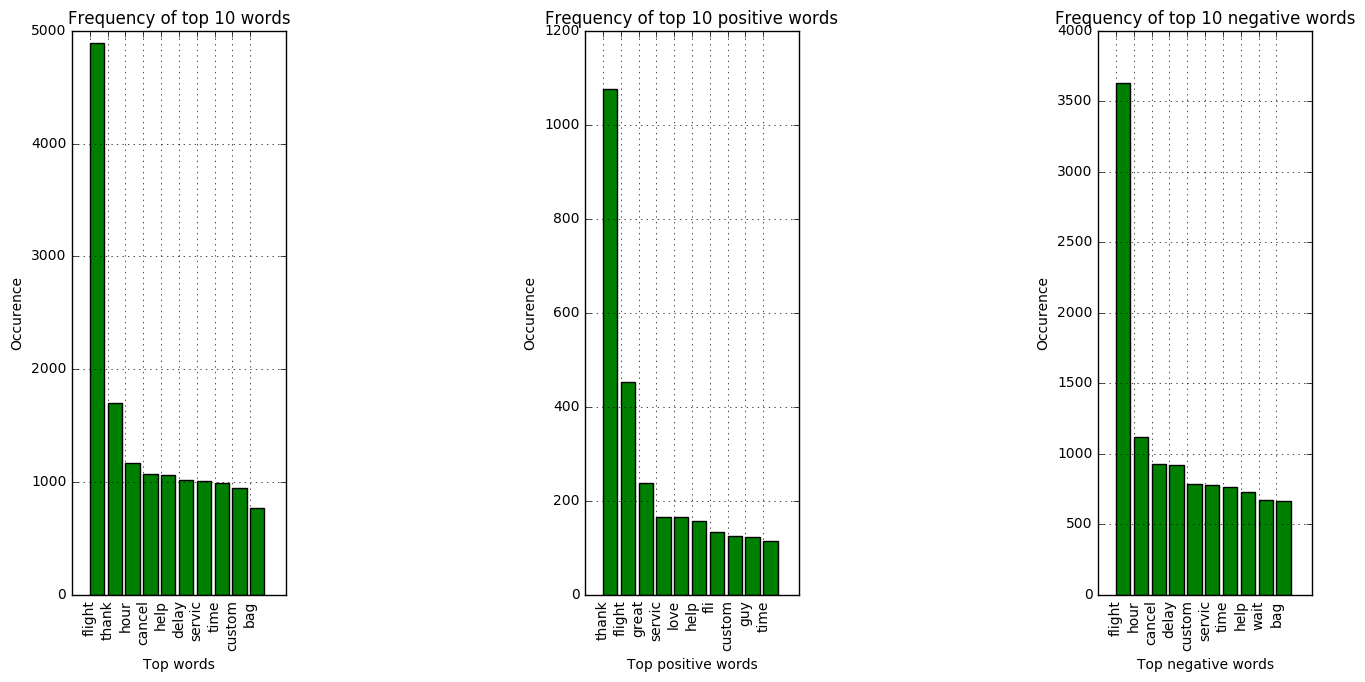

In [26]:
plt.figure(1,figsize=(16, 16))
plt.subplot(251)
print_top_words()  
plt.subplot(253)
print_top_pos_words()
plt.subplot(255)
print_top_neg_words()

### Classifying new tweets: Fit model, Clean Tweet, Predict Mood

#### Fit Model : Logistic Regression 

In [27]:
%%time
import time
# Train Test split data with random state = 11
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.67, random_state=11)

# Vectorize
vect = CountVectorizer(stop_words='english',analyzer="word",min_df = 2, max_df = 0.8)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
feat_dtm = vect.get_feature_names()

# Initialize classifier stats
clf_stats = pd.DataFrame()

Wall time: 1.48 s


In [28]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

start_time = time.time()
clf.fit(X_train_dtm, y_train)
runtime = time.time()-start_time
y_pred = clf.predict(X_test_dtm)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy : ',accuracy)

# Store stats for classifier
clf_stats = clf_stats.append({'Classifier': 'Logistic Regression', 'Accuracy': accuracy, 'Runtime': runtime, 'Callable': 'clf = LogisticRegression()'}, ignore_index=True)

Accuracy :  0.770281456954


#### Clean incoming new tweet:

In [29]:
# Clean input tweet

def fmt_input_tweet(txt):
    
    # Remove @tweets, numbers, hyperlinks that do not start with letters
    txt = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([0-9])"," ",txt)
    #print(txt)
    
    # tokenize into words
    tokens = [word for word in nltk.word_tokenize(txt)]
    #print(tokens)

    # only keep tokens that start with a letter (using regular expressions)
    clean_tokens = [token for token in tokens if re.search(r'^[a-zA-Z]+', token)]
    #print('clean_tokens:\n',clean_tokens)

    # stem the tokens
    stemmer = SnowballStemmer('english')
    stemmed_tokens = [stemmer.stem(t) for t in clean_tokens]
    #print('stemmed_tokens:\n',stemmed_tokens)

    #Lemmatizing
    lemmatizer = nltk.WordNetLemmatizer()
    lem_tokens = [lemmatizer.lemmatize(t) for t in stemmed_tokens]
    #print('lemmatizer : \n',lem_tokens)
    
    #Remove stopwords
    stopwords = nltk.corpus.stopwords.words('english')

    # stem the stopwords
    stemmed_stops = [stemmer.stem(t) for t in stopwords]

    # remove stopwords from stemmed/lemmatized tokens
    lem_tokens_no_stop = [stemmer.stem(t) for t in lem_tokens if t not in stemmed_stops]

    # remove words whose length is <3
    clean_lem_tok = [e for e in lem_tokens_no_stop if len(e) >= 3]
    #print('clean_lem_tok: ',clean_lem_tok)
    
    # Detokenize new tweet for vector processing
    new_formatted_tweet=" ".join(clean_lem_tok)
    #print('new_formatted_tweet: ',new_formatted_tweet)
    
    return new_formatted_tweet

### Classify incoming new tweet:

In [30]:
# Vectorize, fit, transform. Select model randomly
vect = CountVectorizer(stop_words='english', analyzer="word", min_df = 2, max_df = 0.8)
X_dtm = vect.fit_transform(X)
feat_dtm = vect.get_feature_names()

# Select the best performing classifier
Call_clf = str(clf_stats[['Callable','Accuracy']].sort(['Accuracy'], ascending=[False]).head(1).iloc[:,(0)])
temp = Call_clf.__repr__()
Call_clf = temp[temp.index('c'):(temp.index(')'))+1]
print('Model :',temp[(temp.index('=') + 1) : temp.index('(')])
exec(Call_clf)
clf.fit(X_dtm.toarray(), y) 

def classify_new_tweet(new_twt):  

    fmt_twt = fmt_input_tweet(new_twt)
    fmt_twt_dtm = vect.transform([fmt_twt])[0]
    #print('Formatted Tweet :',fmt_twt)
    pred = clf.predict(fmt_twt_dtm.toarray())

    def mood(x):
        return {
            0: 'negative',
            1: 'positive',
            2: 'neutral'
        }[x]

    print('Mood of the incoming tweet is:',mood(pred[0]))

Model :  LogisticRegression


### Predict mood new tweet:

In [31]:
# New input tweet
twt='@united I am sick!! https://www.abc.com'
classify_new_tweet(twt)

Mood of the incoming tweet is: negative


## 3. Sentiment Analysis Review Movies using Gensim Doc2Vec
Pada bagian ketiga, terinspirasi dari [word2vec-sentimen](http://linanqiu.github.io/2015/10/07/word2vec-sentiment/) dalam melakukan sentiment analysis pada review movie yang sangat mudah dilakukan.

## Sentiment Analysis using Doc2Vec
Menggunakan <b>Word2Vec</b> sangatlah mudah, secara singkat proses yang dilakukan yaitu terdapat input sebuah <b>corpus</b>, yang mengeluarkan hasil berupa <b>vectors dari setiap kata.</b>

Dengan keluaran vectors ini, dapat membuat kata yang serupa akan saling berkaitan/berdekatan. Sebagai contoh kata <b>v_man - v_woman</b> sangat berkaitan dengan <b>v_king - v_queen</b>.
Proses ini, dalam dunia NLP disebut dengan <b>word embedding</b> yaitu nama kolektif dalam language modelling dimana kata-kata atau frase dari kosakata dipetakan ke dalam vector.

Dengan menggunakan Doc2Vec, kita bisa mewakilkan sebuah kalimat dengan sebuah vector dan dengan mudah kita dapat menjalankan algoritma klasifikasi sesuka kita. Bukankah menarik?    

## Setup
## Modules
Disini menggunakan <b>gensim</b>, karena <b>gensim</b> memiliki banyak implementasi pada Word2Vec (dan Doc2Vec). Dan juga menggunakan <b>numpy</b> untuk manipulasi array dan <b>sklearn</b> untuk classifier Logistic Regression.

In [32]:
# gensim modules
from gensim import utils
from gensim.models.doc2vec import LabeledSentence
from gensim.models import Doc2Vec

# numpy
import numpy

# random
from random import shuffle

# classifier
from sklearn.linear_model import LogisticRegression

## Input Format
Data input yang digunakan diambil dari Cornell IMDB movie review corpus (http://www.cs.cornell.edu/people/pabo/movie-review-data/). Namun data tersebut masih berupa raw.

Oleh karena itu, dapat menggunakan data yang sudah dilakukan <b>clean</b> dengan dilakukan convert ke dalam lower case dan menghapus punctuation. Untuk data yang telah diolah dapat diperoleh di [sini]()